## Objective:
The primary objective of this project is to analyze the relationships between various factors influencing real estate prices
(e.g., property size, location, number of rooms, etc.) and identify trends and patterns that can help stakeholders make informed decisions.

## Understanding Business Problems for Real Estate Data
The goal is to analyze real estate data to identify trends, property price influencers, and investment opportunities.
Key questions include: What factors drive property prices? Which areas show high demand? Insights from the data will 
guide better decision-making for buyers, sellers, and investors.

## Problem Statement:
Problem statement analyze real estate data to understand the key factors influencing property prices. 
By performing Exploratory Data Analysis (EDA) on the dataset, we aim to uncover trends, patterns, and relationships between 
the target variable, "price," and other features such as location. 
The insights derived will help in accurate price prediction and informed decision-making for stakeholders.

In [4]:
# lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# train test split
from sklearn.model_selection import train_test_split

In [5]:
# importing dataset
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\Real_Estate_EDA\Real_Estate_properties.csv")
data

,Possession Status,Price,Covered Area,Carpet Area,City,Type of Property,bedroom,Bathroom,Parking,Location,Society,Ownership Type,isPrimeLocationProperty,Maintenance Charges
0,Under Construction,3150000.0,635.0,375.0,Thane,Apartment,1,2.0,1 Covered,"Kalyan West, Thane",Y,Freehold,Y,3.0
1,Ready to Move,6300000.0,579.0,579.0,Thane,Apartment,2,2.0,1 Covered,"Kalyan West, Thane",Y,Freehold,Y,3.0
2,Ready to Move,5400000.0,850.0,585.0,Thane,Apartment,2,2.0,1 Open,"Kalyan West, Thane",Y,Freehold,Y,1200.0
3,Under Construction,9000000.0,1050.0,815.0,Thane,Apartment,2,2.0,"1 Covered, 1 Open","Kalyan West, Thane",Y,Freehold,Y,3200.0
4,Under Construction,4950000.0,561.0,419.0,Thane,Apartment,1,2.0,NaN,"Kalyan West, Thane",Y,Freehold,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,Dec '26,22200000.0,NaN,618.0,Mumbai,Apartment,2,2.0,1 Covered,"Jogeshwari Vikhroli Link Road, Mumbai",N,NaN,Y,NaN
12681,Under Construction,31000000.0,1376.0,1076.0,Mumbai,Apartment,3,3.0,1 Covered,"Jogeshwari Vikhroli Link Road, Mumbai",Y,Freehold,Y,12.0
12682,Under Construction,18500000.0,970.0,618.0,Mumbai,Apartment,2,2.0,1 Covered,"Jogeshwari Vikhroli Link Road, Mumbai",Y,Freehold,Y,9.0
12683,Ready to Move,22000000.0,NaN,821.0,Mumbai,Apartment,2,2.0,1 Open,"Andheri East, Mumbai",Y,Freehold,Y,4000.0


In [6]:
#EDA for each data analysis
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("* "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (12685, 14)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 177590
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of         Possession Status       Price  Covered Area  Carpet Area    City  \
0      Under Construction   3150000.0         635.0        375.0   Thane   
1           Ready to Move   6300000.0         579.0        579.0   Thane   
2           Ready to Move   5400000.0         850.0        585.0   Thane   
3      Under Construction   9000000.0        1050.0        815.0   Thane   
4      Under Construction   4950000.0         561.0        419.0   Thane   
...                   ...         ...           ...          ...     ...   
12680             Dec '26  22200000.0           NaN        618.0  Mumbai   
12681  Under Construction  31000000.0        1376.0       1076.0  Mumbai   
12682  Under Construction  18500000.0       

In [7]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [8]:
 Num_col(data,"Bathroom")

Numerical Columns Analysis:
mean:2.1433893468611287
median:2.0
mode:2.0
var:0.8592634698002165
std:0.9269646540188123
skew:1.3283395953866595
MIN:1.0
MAAX:10.0
Range:9.0


<Axes: xlabel='Bathroom', ylabel='Count'>

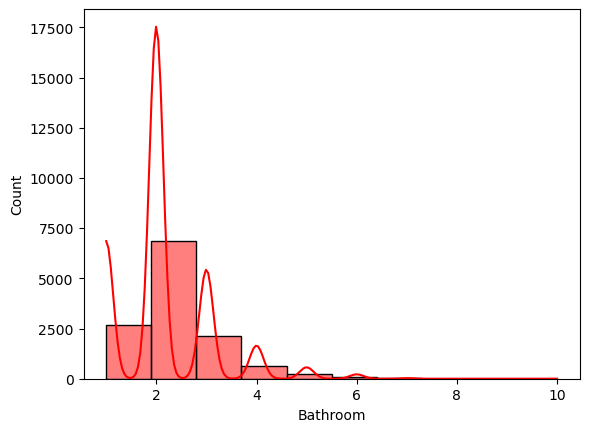

In [9]:
sns.histplot(data=data,x="Bathroom",bins=10,kde=True,color="red")

In [10]:
Num_col(data,"Carpet Area")

Numerical Columns Analysis:
mean:819.2012237244646
median:671.0
mode:450.0
var:342269.2402985429
std:585.0378109990353
skew:6.45746798406502
MIN:2.0
MAAX:20870.0
Range:20868.0


<Axes: xlabel='Carpet Area', ylabel='Count'>

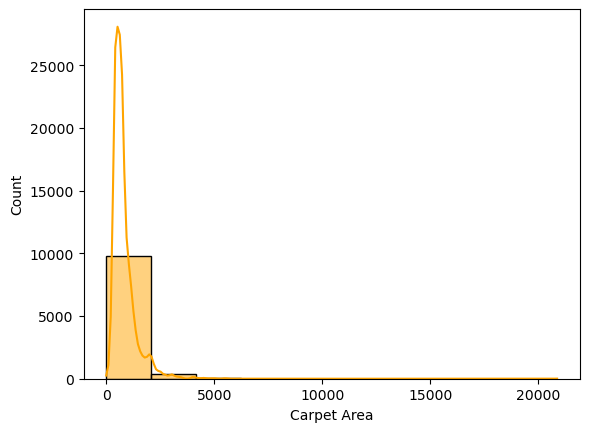

In [11]:
sns.histplot(data=data,x="Carpet Area",bins=10,kde=True,color="Orange")

In [12]:
Num_col(data,"Covered Area")

Numerical Columns Analysis:
mean:1037.7464392474064
median:850.0
mode:650.0
var:529005.1313400863
std:727.3273893784602
skew:3.849281874575315
MIN:10.0
MAAX:15006.0
Range:14996.0


<Axes: xlabel='Covered Area', ylabel='Count'>

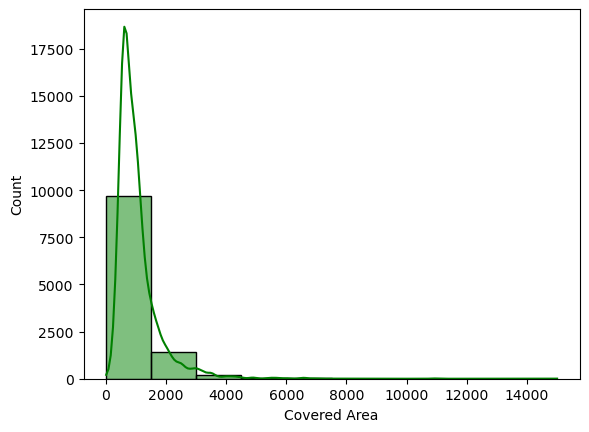

In [13]:
sns.histplot(data=data,x="Covered Area",bins=10,kde=True,color="Green")

In [14]:
Num_col(data,"Maintenance Charges")

Numerical Columns Analysis:
mean:9076.811873308929
median:2500.0
mode:0.0
var:57599164677.88998
std:239998.25973929474
skew:67.4975874411053
MIN:0.0
MAAX:17680000.0
Range:17680000.0


<Axes: xlabel='Maintenance Charges', ylabel='Count'>

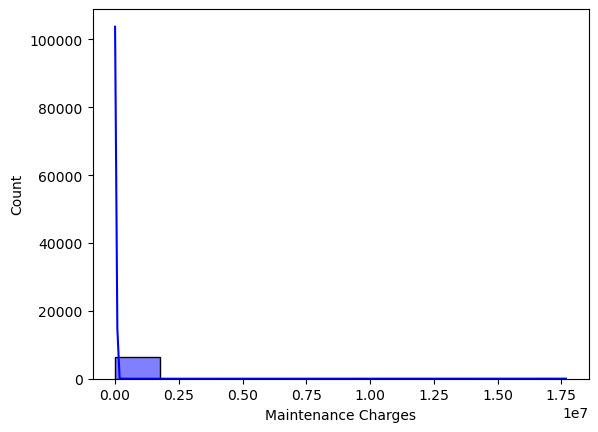

In [15]:
sns.histplot(data=data,x="Maintenance Charges",bins=10,kde=True,color="Blue")

In [16]:
Num_col(data,"bedroom")

Numerical Columns Analysis:
mean:1.9871501773748521
median:2.0
mode:2
var:0.890011469482164
std:0.9434041919994653
skew:0.900067500823549
MIN:1
MAAX:6
Range:5


<Axes: xlabel='bedroom', ylabel='Count'>

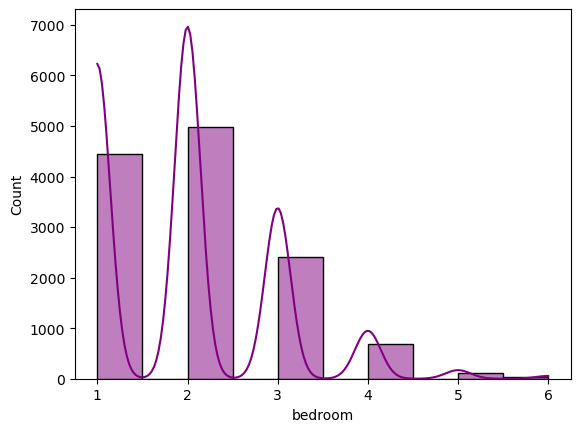

In [17]:
sns.histplot(data=data,x="bedroom",bins=10,kde=True,color="Purple")

In [18]:
Num_col(data,"Price")

Numerical Columns Analysis:
mean:26402614.49019919
median:13500000.0
mode:9000000.0
var:1.3349145965572051e+17
std:365364830.8960791
skew:110.35727935416121
MIN:100000.0
MAAX:40800000001.0
Range:40799900001.0


<Axes: xlabel='Price', ylabel='Count'>

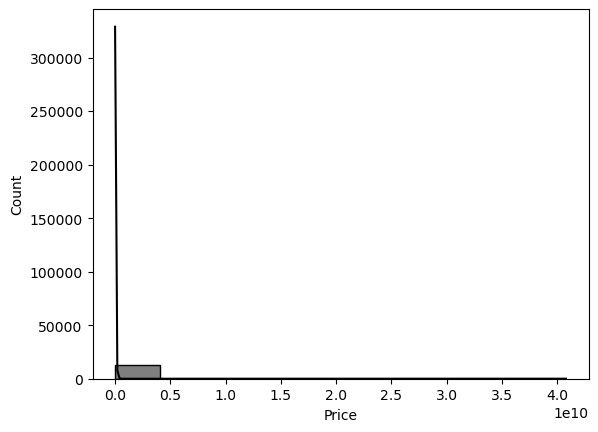

In [19]:
sns.histplot(data=data,x="Price",bins=10,kde=True,color="black")

In [20]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(data.head())

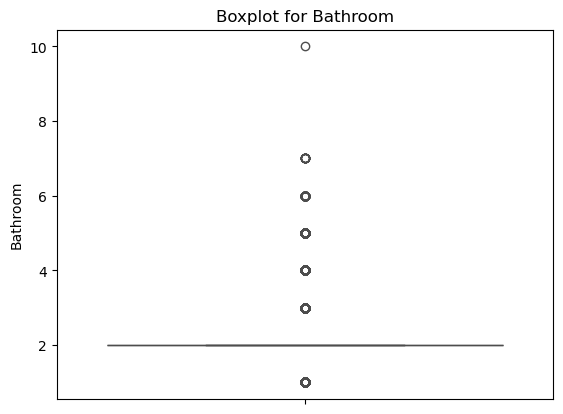

25% Quantile q1 = 2.0
75% Quantile q3 = 2.0
IQR = 0.0

--------------------------------------------------------------------------------
Lower Tail = 2.0
Upper Tail = 2.0
--------------------------------------------------------------------------------

Outliers :
         Possession Status       Price  Covered Area  Carpet Area    City  \
7           Ready to Move   4200000.0         650.0        585.0   Thane   
8      Under Construction   3449000.0         592.0        370.0   Thane   
9           Ready to Move   5000000.0         644.0        430.0   Thane   
12          Ready to Move   4900000.0         595.0          NaN   Thane   
13          Ready to Move   2187500.0         595.0        450.0   Thane   
...                   ...         ...           ...          ...     ...   
12671       Ready to Move  62500000.0        2210.0       1600.0  Mumbai   
12672       Ready to Move  29040000.0        1600.0        967.0  Mumbai   
12673             Dec '26  27500000.0           NaN 

In [21]:
Checking_and_Handling_Of_Outliers(data, "Bathroom")

In [22]:
data["Bathroom"]=data["Bathroom"].fillna(data["Bathroom"].median())

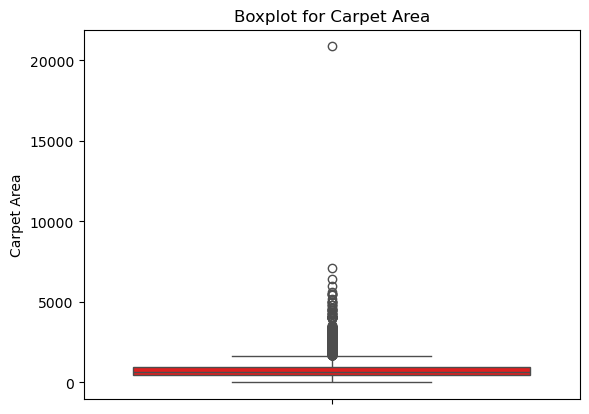

25% Quantile q1 = 468.0
75% Quantile q3 = 950.0
IQR = 482.0

--------------------------------------------------------------------------------
Lower Tail = -255.0
Upper Tail = 1673.0
--------------------------------------------------------------------------------

Outliers :
         Possession Status        Price  Covered Area  Carpet Area    City  \
97          Ready to Move   25200000.0        2900.0       2115.0   Thane   
380         Ready to Move  135000000.0        3300.0       2300.0  Mumbai   
381         Ready to Move  120000000.0        4300.0       2800.0  Mumbai   
397         Ready to Move  135000000.0        3300.0       2300.0  Mumbai   
398         Ready to Move  120000000.0        4300.0       2800.0  Mumbai   
...                   ...          ...           ...          ...     ...   
12657       Ready to Move   53100000.0        3094.0       1864.0  Mumbai   
12658       Ready to Move  100000000.0        3193.0       2065.0  Mumbai   
12661  Under Construction   899

In [23]:
Checking_and_Handling_Of_Outliers(data, "Carpet Area")

In [24]:
data["Carpet Area"]=data["Carpet Area"].fillna(data["Carpet Area"].median())

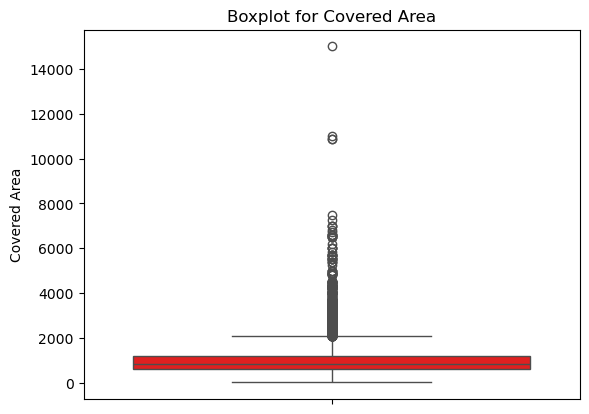

25% Quantile q1 = 605.5
75% Quantile q3 = 1200.0
IQR = 594.5

--------------------------------------------------------------------------------
Lower Tail = -286.25
Upper Tail = 2091.75
--------------------------------------------------------------------------------

Outliers :
         Possession Status        Price  Covered Area  Carpet Area    City  \
27     Under Construction   14796000.0        2160.0       1385.0   Thane   
52     Under Construction   14796000.0        2160.0       1385.0   Thane   
97          Ready to Move   25200000.0        2900.0       1673.0   Thane   
367         Ready to Move   50000000.0        2500.0       1530.0  Mumbai   
380         Ready to Move  135000000.0        3300.0       1673.0  Mumbai   
...                   ...          ...           ...          ...     ...   
12636       Ready to Move   51200000.0        2150.0       1673.0  Mumbai   
12657       Ready to Move   53100000.0        3094.0       1673.0  Mumbai   
12658       Ready to Move  1

In [25]:
Checking_and_Handling_Of_Outliers(data, "Covered Area")

In [26]:
data["Covered Area"]=data["Covered Area"].fillna(data["Covered Area"].median())

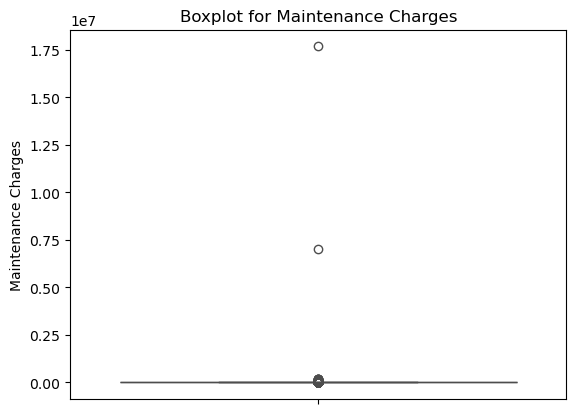

25% Quantile q1 = 10.0
75% Quantile q3 = 6000.0
IQR = 5990.0

--------------------------------------------------------------------------------
Lower Tail = -8975.0
Upper Tail = 14985.0
--------------------------------------------------------------------------------

Outliers :
         Possession Status        Price  Covered Area  Carpet Area    City  \
346    Under Construction    3200000.0        385.00        385.0   Thane   
381         Ready to Move  120000000.0       2091.75       1673.0  Mumbai   
398         Ready to Move  120000000.0       2091.75       1673.0  Mumbai   
441    Under Construction   75000000.0       1980.00       1200.0  Mumbai   
493         Ready to Move   35000000.0       1500.00       1150.0  Mumbai   
...                   ...          ...           ...          ...     ...   
12595  Under Construction   40900000.0       2041.00       1296.0  Mumbai   
12606       Ready to Move   37500000.0       1377.00        890.0  Mumbai   
12657       Ready to Move   

In [27]:
Checking_and_Handling_Of_Outliers(data, "Maintenance Charges")

In [28]:
data["Maintenance Charges"]=data["Maintenance Charges"].fillna(data["Maintenance Charges"].median())

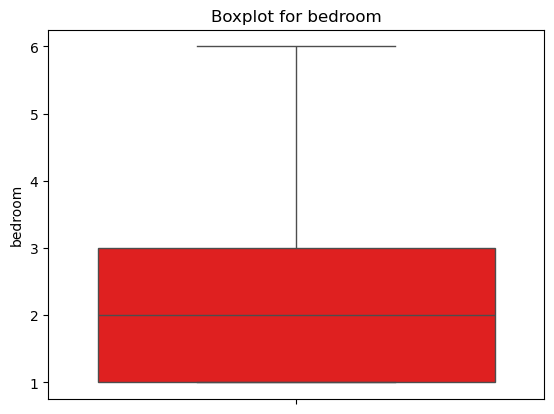

25% Quantile q1 = 1.0
75% Quantile q3 = 3.0
IQR = 2.0

--------------------------------------------------------------------------------
Lower Tail = -2.0
Upper Tail = 6.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Possession Status, Price, Covered Area, Carpet Area, City, Type of Property, bedroom, Bathroom, Parking, Location, Society, Ownership Type, isPrimeLocationProperty, Maintenance Charges]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

    Possession Status      Price  Covered Area  Carpet Area   City  \
0  Under Construction  3150000.0         635.0        375.0  Thane   
1       Ready to Move  6300000.0         579.0        579.0  Thane   
2       Ready to Move  5400000.0         850.0        585.0  Thane   
3  Under Construction  9000000.0        1050.0        815.0  Thane   
4  Under Construction  4950000.0         561.0  

In [29]:
Checking_and_Handling_Of_Outliers(data, "bedroom")

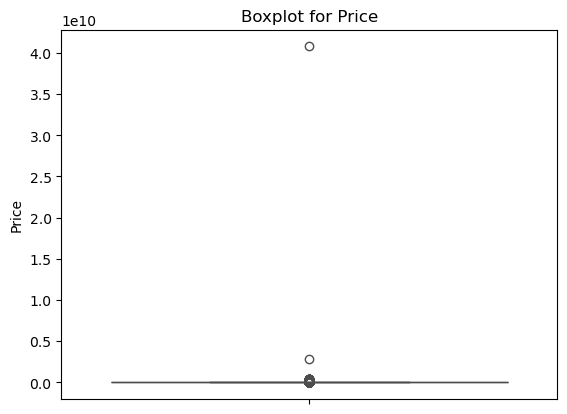

25% Quantile q1 = 7000000.0
75% Quantile q3 = 25500000.0
IQR = 18500000.0

--------------------------------------------------------------------------------
Lower Tail = -20750000.0
Upper Tail = 53250000.0
--------------------------------------------------------------------------------

Outliers :
         Possession Status        Price  Covered Area  Carpet Area    City  \
380         Ready to Move  135000000.0       2091.75       1673.0  Mumbai   
381         Ready to Move  120000000.0       2091.75       1673.0  Mumbai   
397         Ready to Move  135000000.0       2091.75       1673.0  Mumbai   
398         Ready to Move  120000000.0       2091.75       1673.0  Mumbai   
438         Ready to Move   97500000.0       2091.75       1673.0  Mumbai   
...                   ...          ...           ...          ...     ...   
12661  Under Construction   89900000.0       2091.75       1673.0  Mumbai   
12665  Under Construction   73600000.0        850.00       1673.0  Mumbai   
12666  U

In [30]:
Checking_and_Handling_Of_Outliers(data, "Price")

In [31]:
data["Price"]=data["Price"].fillna(data["Price"].median())

In [32]:
data.isna().sum()

Possession Status            78
Price                         0
Covered Area                  0
Carpet Area                   0
City                          0
Type of Property              0
bedroom                       0
Bathroom                      0
Parking                    6159
Location                    323
Society                       0
Ownership Type             3260
isPrimeLocationProperty       0
Maintenance Charges           0
dtype: int64

In [33]:
# Analysis of Categorical Columns(Variable)
def Cat_col(data, col):
    unique_values = data[col].unique()  # Fixed typo: renamed to unique_values
    value_counts = data[col].value_counts()
    mode = data[col].mode()[0]  # Fixed mode access by adding parentheses

    # Enhanced string formatting for clarity
    print(f"Unique Values in '{col}':\n{unique_values}\n")
    print(f"Value Counts in '{col}':\n{value_counts}\n")
    print(f"Mode of '{col}': {mode}\n")


    data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"data-{col} (pie chart)")
    plt.show

In [34]:
data.isna().sum()

Possession Status            78
Price                         0
Covered Area                  0
Carpet Area                   0
City                          0
Type of Property              0
bedroom                       0
Bathroom                      0
Parking                    6159
Location                    323
Society                       0
Ownership Type             3260
isPrimeLocationProperty       0
Maintenance Charges           0
dtype: int64

In [35]:
data.dtypes

Possession Status           object
Price                      float64
Covered Area               float64
Carpet Area                float64
City                        object
Type of Property            object
bedroom                      int64
Bathroom                   float64
Parking                     object
Location                    object
Society                     object
Ownership Type              object
isPrimeLocationProperty     object
Maintenance Charges        float64
dtype: object

Unique Values in 'City':
['Thane' 'Kalyan' 'Mumbai' 'Agartala' 'Palghar' 'Bhiwandi' 'Gurgaon'
 'Hyderabad' 'Nagpur']

Value Counts in 'City':
City
Mumbai       8542
Thane        4113
Kalyan          9
Hyderabad       8
Nagpur          7
Palghar         2
Bhiwandi        2
Agartala        1
Gurgaon         1
Name: count, dtype: int64

Mode of 'City': Mumbai



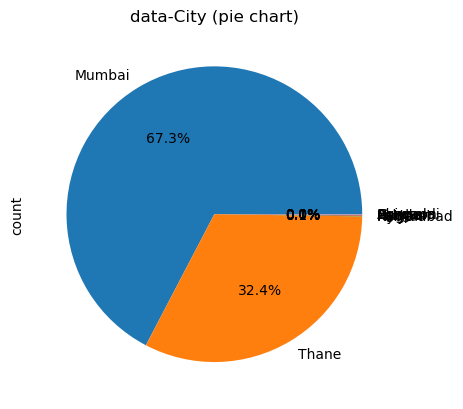

In [36]:
Cat_col(data,"City")

Unique Values in 'Location':
['Kalyan West, Thane' nan 'Kalyan West, Kalyan' 'Bhoiwada, Thane'
 'Rambaug Lane Number 4, Thane' 'Kalyan East, Thane' 'Chakki Naka, Thane'
 'Nandivali Gaon, Thane' 'Kalyan East, Kalyan' 'Kalyan East, Mumbai'
 'Tisgaon Naka, Kalyan' 'Tisgaon Naka, Thane' 'Oshiwara, Mumbai'
 'Bandivali, Mumbai' 'Jogeshwari West, Mumbai' 'Malcom Baug, Mumbai'
 'Amrut Nagar, Mumbai' 'Behram Baug, Mumbai' 'Indira Nagar, Mumbai'
 'Jogeshwari Vikhroli Link Road, Mumbai' 'Jogeshwari East, Mumbai'
 'Majas Wadi, Mumbai' 'Natwar Nagar, Mumbai' 'Banamalipur, Agartala'
 'Hind Nagar, Mumbai' 'Sham Nagar, Mumbai' 'Dombivli East, Thane'
 'Sonar Pada, Thane' 'Nandivli, Thane' 'Desai Village, Thane'
 'Tilak Nagar, Thane' 'Tilak Nagar, Mumbai' 'Gandhi Nagar Dombivli, Thane'
 'Usarghar Gaon, Thane' 'Dombivli East, Kalyan' 'Dahisar West, Mumbai'
 'Kandarpada, Mumbai' 'Mhatre Wadi, Mumbai' 'Gomant Nagar, Mumbai'
 'Leo Peter Wadi, Mumbai' 'Shanti Ashram, Mumbai' 'Navagaon, Mumbai'
 'Ashok Van, M

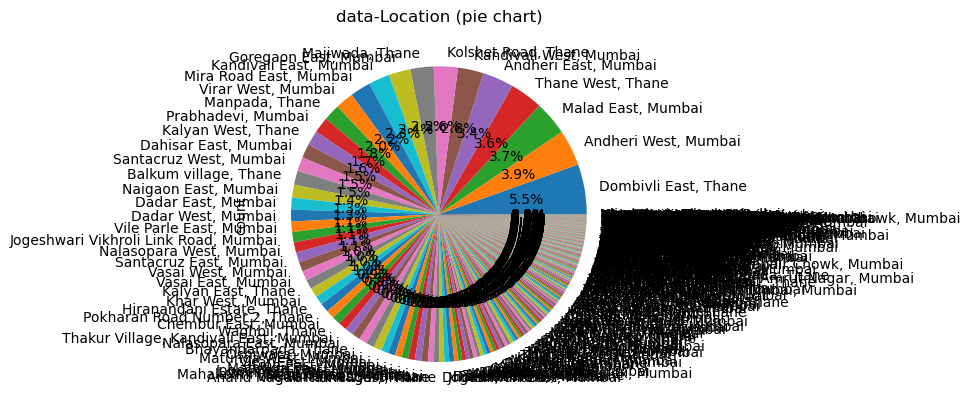

In [37]:
Cat_col(data,"Location")

Unique Values in 'Ownership Type':
['Freehold' 'Co-operative Society' nan 'Power Of Attorney' 'Leasehold']

Value Counts in 'Ownership Type':
Ownership Type
Freehold                6673
Co-operative Society    2511
Leasehold                179
Power Of Attorney         62
Name: count, dtype: int64

Mode of 'Ownership Type': Freehold



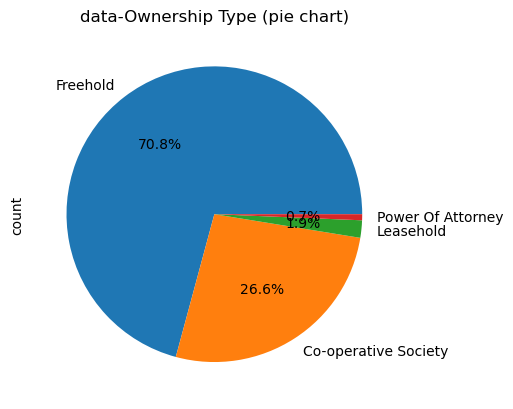

In [38]:
Cat_col(data,"Ownership Type")

Unique Values in 'Parking':
['1 Covered' '1 Open' '1 Covered, 1 Open' nan '2 Covered' '2 Open'
 '5 Open' '3 Covered' '4 Covered' '10 Covered' '2 Covered, 2 Open'
 '10 Open' '6 Open' '202 Covered' '306 Open' '8 Covered' '20 Open'
 '32 Covered' '180 Covered' '9 Open' '15 Open' '5 Covered' '100 Open'
 '50 Open' '10 Covered, 20 Open' '12 Covered' '7 Open' '40 Open'
 '503 Open' '1 Covered, 2 Open' '2 Covered, 1 Open' '9 Covered' '3 Open'
 '505 Covered' '47 Covered' '7 Covered, 1 Open' '4 Open' '14 Open'
 '20 Covered' '8 Open' '606 Covered, 606 Open' '10 Covered, 10 Open'
 '111 Open' '138 Covered' '392 Covered' '7 Covered' '18 Covered'
 '27 Covered' '181 Covered' '6 Covered, 6 Open' '801 Covered'
 '2 Covered, 4 Open' '16 Covered' '1 Covered, 3 Open' '12 Open'
 '50 Covered' '3 Covered, 1 Open' '25 Open' '408 Covered'
 '1 Covered, 10 Open' '45 Covered' '3 Covered, 2 Open' '107 Covered'
 '150 Covered' '200 Covered' '22 Covered' '16 Open'
 '250 Covered, 200 Open' '24 Covered, 21 Open' '76 Open' 

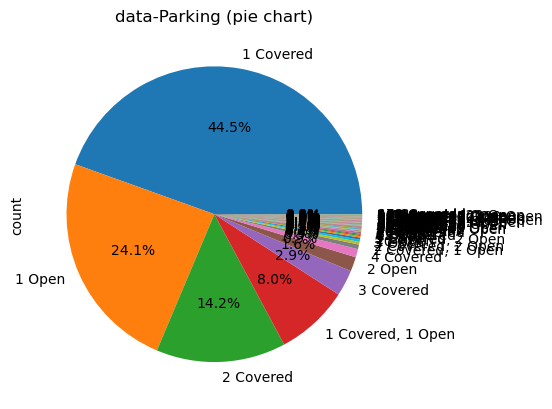

In [39]:
Cat_col(data,"Parking")

Unique Values in 'Possession Status':
['Under Construction' 'Ready to Move' nan "Jun '26" "Dec '28" "Nov '25"
 "Dec '26" "Mar '25" "Dec '23" "Jun '24" "Dec '24" "Sep '23" "Mar '24"
 'Immediately' "Dec '27" "Dec '25" "Apr '28" "Nov '23" "Apr '24" "Jun '25"
 'Select Date' "Sep '26"]

Value Counts in 'Possession Status':
Possession Status
Ready to Move         9735
Under Construction    2630
Dec '26                 50
Dec '24                 31
Dec '23                 29
Dec '25                 28
Jun '24                 21
Dec '27                 16
Jun '26                 16
Dec '28                 12
Mar '25                  6
Mar '24                  5
Apr '28                  4
Sep '26                  4
Immediately              4
Nov '25                  3
Apr '24                  3
Jun '25                  3
Sep '23                  3
Nov '23                  2
Select Date              2
Name: count, dtype: int64

Mode of 'Possession Status': Ready to Move



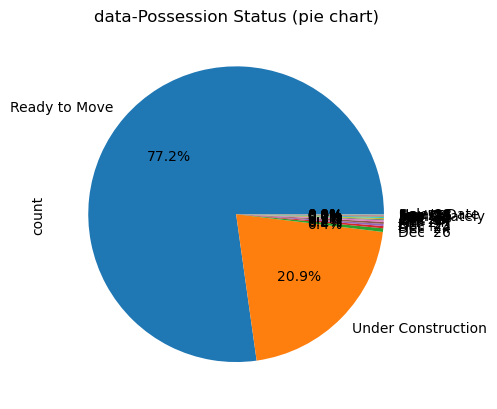

In [40]:
Cat_col(data,"Possession Status")

Unique Values in 'Society':
['Y' 'N']

Value Counts in 'Society':
Society
Y    6383
N    6302
Name: count, dtype: int64

Mode of 'Society': Y



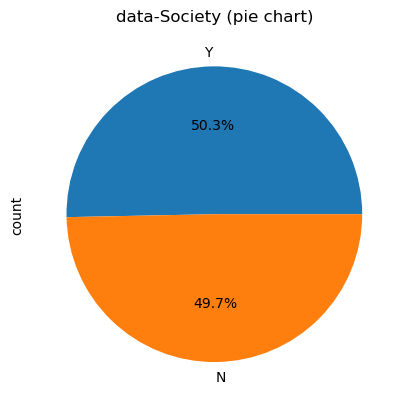

In [41]:
Cat_col(data,"Society")

Unique Values in 'Type of Property':
['Apartment' 'Residential House' 'Builder Floor Apartment' 'Penthouse'
 'Villa']

Value Counts in 'Type of Property':
Type of Property
Apartment                  12119
Residential House            244
Builder Floor Apartment      205
Villa                         79
Penthouse                     38
Name: count, dtype: int64

Mode of 'Type of Property': Apartment



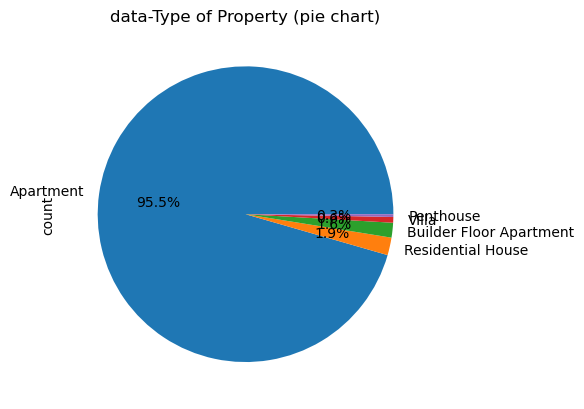

In [42]:
Cat_col(data,"Type of Property")

Unique Values in 'isPrimeLocationProperty':
['Y' 'N']

Value Counts in 'isPrimeLocationProperty':
isPrimeLocationProperty
Y    9414
N    3271
Name: count, dtype: int64

Mode of 'isPrimeLocationProperty': Y



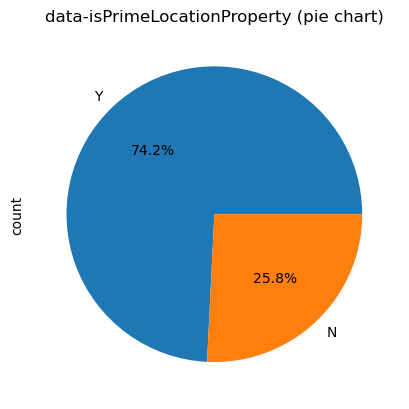

In [43]:
Cat_col(data,"isPrimeLocationProperty")

In [44]:
data.isna().sum()

Possession Status            78
Price                         0
Covered Area                  0
Carpet Area                   0
City                          0
Type of Property              0
bedroom                       0
Bathroom                      0
Parking                    6159
Location                    323
Society                       0
Ownership Type             3260
isPrimeLocationProperty       0
Maintenance Charges           0
dtype: int64

In [45]:
# replace missing value of Categorical Column
data["Location"]=data["Location"].fillna(data["Location"].mode()[0])
data["Ownership Type"]=data["Ownership Type"].fillna(data["Ownership Type"].mode()[0])
data["Parking"]=data["Parking"].fillna(data["Parking"].mode()[0])
data["Possession Status"]=data["Possession Status"].fillna(data["Possession Status"].mode()[0])

In [46]:
data.isna().sum()

Possession Status          0
Price                      0
Covered Area               0
Carpet Area                0
City                       0
Type of Property           0
bedroom                    0
Bathroom                   0
Parking                    0
Location                   0
Society                    0
Ownership Type             0
isPrimeLocationProperty    0
Maintenance Charges        0
dtype: int64

In [47]:
data.dtypes

Possession Status           object
Price                      float64
Covered Area               float64
Carpet Area                float64
City                        object
Type of Property            object
bedroom                      int64
Bathroom                   float64
Parking                     object
Location                    object
Society                     object
Ownership Type              object
isPrimeLocationProperty     object
Maintenance Charges        float64
dtype: object

In [48]:
# Bivariate analysis of columns
def bivariate_violin_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()


C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\3790340880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")


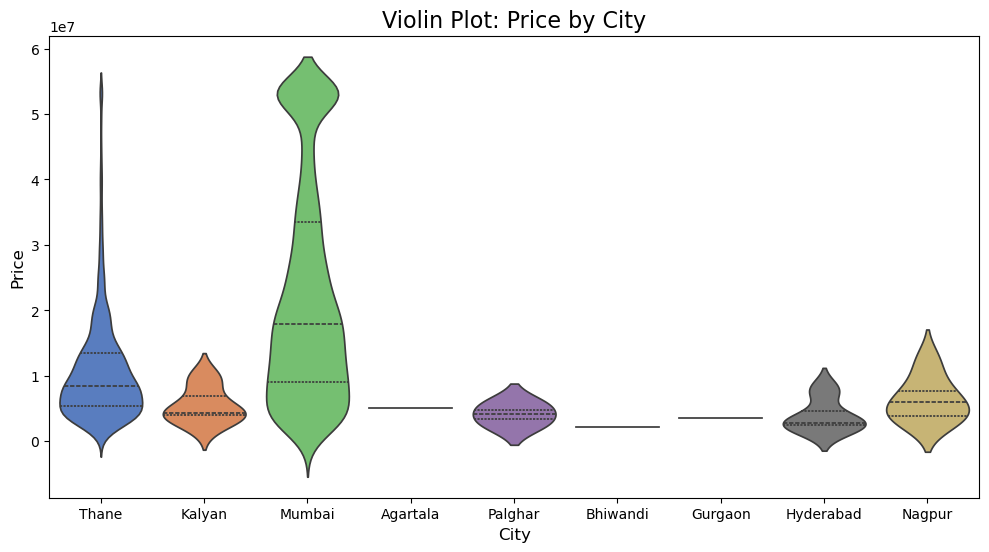

In [49]:
bivariate_violin_plot(data,"City" ,"Price")


In [50]:
def bivariate_box_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_col, y=numerical_col, data=data, palette="muted")
    plt.title(f'Box Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()


C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\3297854816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_col, y=numerical_col, data=data, palette="muted")


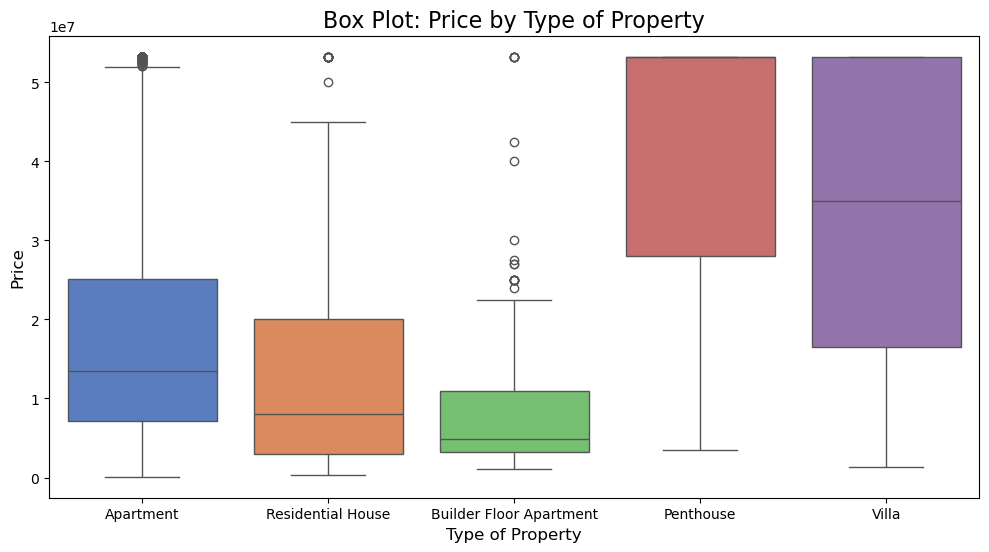

In [51]:
bivariate_box_plot(data,"Type of Property","Price")

In [52]:
data.dtypes

Possession Status           object
Price                      float64
Covered Area               float64
Carpet Area                float64
City                        object
Type of Property            object
bedroom                      int64
Bathroom                   float64
Parking                     object
Location                    object
Society                     object
Ownership Type              object
isPrimeLocationProperty     object
Maintenance Charges        float64
dtype: object

In [53]:
# Encoding 
#Bathroom 
data["City"].unique()

array(['Thane', 'Kalyan', 'Mumbai', 'Agartala', 'Palghar', 'Bhiwandi',
       'Gurgaon', 'Hyderabad', 'Nagpur'], dtype=object)

In [54]:
data["City_encoded"]=data["City"].replace({'Thane':0, 'Kalyan':1, 'Mumbai':3, 'Agartala':4, 'Palghar':5, 'Bhiwandi':6,
       'Gurgaon':7, 'Hyderabad':8, 'Nagpur':9})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\706628898.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["City_encoded"]=data["City"].replace({'Thane':0, 'Kalyan':1, 'Mumbai':3, 'Agartala':4, 'Palghar':5, 'Bhiwandi':6,


In [55]:
#Location Column
data["Location"].unique()

array(['Kalyan West, Thane', 'Dombivli East, Thane',
       'Kalyan West, Kalyan', 'Bhoiwada, Thane',
       'Rambaug Lane Number 4, Thane', 'Kalyan East, Thane',
       'Chakki Naka, Thane', 'Nandivali Gaon, Thane',
       'Kalyan East, Kalyan', 'Kalyan East, Mumbai',
       'Tisgaon Naka, Kalyan', 'Tisgaon Naka, Thane', 'Oshiwara, Mumbai',
       'Bandivali, Mumbai', 'Jogeshwari West, Mumbai',
       'Malcom Baug, Mumbai', 'Amrut Nagar, Mumbai',
       'Behram Baug, Mumbai', 'Indira Nagar, Mumbai',
       'Jogeshwari Vikhroli Link Road, Mumbai', 'Jogeshwari East, Mumbai',
       'Majas Wadi, Mumbai', 'Natwar Nagar, Mumbai',
       'Banamalipur, Agartala', 'Hind Nagar, Mumbai',
       'Sham Nagar, Mumbai', 'Sonar Pada, Thane', 'Nandivli, Thane',
       'Desai Village, Thane', 'Tilak Nagar, Thane',
       'Tilak Nagar, Mumbai', 'Gandhi Nagar Dombivli, Thane',
       'Usarghar Gaon, Thane', 'Dombivli East, Kalyan',
       'Dahisar West, Mumbai', 'Kandarpada, Mumbai',
       'Mhatre Wadi

In [56]:
# Define the mapping dictionary
Location_count=data["Location"].value_counts()
data["Location_encoded"]=data["Location"].map(Location_count)
print(data[["Location","Location_encoded"]].head())

             Location  Location_encoded
0  Kalyan West, Thane               199
1  Kalyan West, Thane               199
2  Kalyan West, Thane               199
3  Kalyan West, Thane               199
4  Kalyan West, Thane               199


In [57]:
data.drop(columns=["Location"],inplace=True)

In [58]:
#Ownership Type Column
data["Ownership Type"].unique()

array(['Freehold', 'Co-operative Society', 'Power Of Attorney',
       'Leasehold'], dtype=object)

In [59]:
data["Ownership Type_encoded"]=data["Ownership Type"].replace({'Freehold':0, 'Co-operative Society':1, 'Power Of Attorney':2,
       'Leasehold':3})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\1978593805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Ownership Type_encoded"]=data["Ownership Type"].replace({'Freehold':0, 'Co-operative Society':1, 'Power Of Attorney':2,


In [60]:
data.drop(columns=["Ownership Type"],inplace=True)

In [61]:
#Ownership Type Column
data["Parking"].unique()

array(['1 Covered', '1 Open', '1 Covered, 1 Open', '2 Covered', '2 Open',
       '5 Open', '3 Covered', '4 Covered', '10 Covered',
       '2 Covered, 2 Open', '10 Open', '6 Open', '202 Covered',
       '306 Open', '8 Covered', '20 Open', '32 Covered', '180 Covered',
       '9 Open', '15 Open', '5 Covered', '100 Open', '50 Open',
       '10 Covered, 20 Open', '12 Covered', '7 Open', '40 Open',
       '503 Open', '1 Covered, 2 Open', '2 Covered, 1 Open', '9 Covered',
       '3 Open', '505 Covered', '47 Covered', '7 Covered, 1 Open',
       '4 Open', '14 Open', '20 Covered', '8 Open',
       '606 Covered, 606 Open', '10 Covered, 10 Open', '111 Open',
       '138 Covered', '392 Covered', '7 Covered', '18 Covered',
       '27 Covered', '181 Covered', '6 Covered, 6 Open', '801 Covered',
       '2 Covered, 4 Open', '16 Covered', '1 Covered, 3 Open', '12 Open',
       '50 Covered', '3 Covered, 1 Open', '25 Open', '408 Covered',
       '1 Covered, 10 Open', '45 Covered', '3 Covered, 2 Open',
  

In [62]:
# Define the mapping dictionary
Parking_count=data["Parking"].value_counts()
data["Parking_encoded"]=data["Parking"].map(Parking_count)
print(data[["Parking","Parking_encoded"]].head())

             Parking  Parking_encoded
0          1 Covered             9064
1          1 Covered             9064
2             1 Open             1575
3  1 Covered, 1 Open              525
4          1 Covered             9064


In [63]:
data.drop(columns=["Parking"],inplace=True)

In [64]:
#Possession Status Column
data["Possession Status"].unique()

array(['Under Construction', 'Ready to Move', "Jun '26", "Dec '28",
       "Nov '25", "Dec '26", "Mar '25", "Dec '23", "Jun '24", "Dec '24",
       "Sep '23", "Mar '24", 'Immediately', "Dec '27", "Dec '25",
       "Apr '28", "Nov '23", "Apr '24", "Jun '25", 'Select Date',
       "Sep '26"], dtype=object)

In [65]:
data["Possession Status_encoded"]=data["Possession Status"].replace({'Under Construction':0, 'Ready to Move':1, "Jun '26":2, "Dec '28":3,
       "Nov '25":4, "Dec '26":5, "Mar '25":6, "Dec '23":7, "Jun '24":8, "Dec '24":9,
       "Sep '23":10, "Mar '24":11, 'Immediately':12, "Dec '27":13, "Dec '25":14,
       "Apr '28":15, "Nov '23":16, "Apr '24":17, "Jun '25":18, 'Select Date':19,
       "Sep '26":20})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\3017873097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Possession Status_encoded"]=data["Possession Status"].replace({'Under Construction':0, 'Ready to Move':1, "Jun '26":2, "Dec '28":3,


In [66]:
data.drop(columns=["Possession Status"],inplace=True)

In [67]:
data.dtypes

Price                        float64
Covered Area                 float64
Carpet Area                  float64
City                          object
Type of Property              object
bedroom                        int64
Bathroom                     float64
Society                       object
isPrimeLocationProperty       object
Maintenance Charges          float64
City_encoded                   int64
Location_encoded               int64
Ownership Type_encoded         int64
Parking_encoded                int64
Possession Status_encoded      int64
dtype: object

In [68]:
#Society Column
data["Society"].unique()

array(['Y', 'N'], dtype=object)

In [69]:
data["Society_encoded"]=data["Society"].replace({'Y':0, 'N':1})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\4023502697.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Society_encoded"]=data["Society"].replace({'Y':0, 'N':1})


In [70]:
data.drop(columns=["Society"],inplace=True)

In [71]:
# Type of Property Column
data["Type of Property"].unique()

array(['Apartment', 'Residential House', 'Builder Floor Apartment',
       'Penthouse', 'Villa'], dtype=object)

In [72]:
data["Type of Property_encoded"]=data["Type of Property"].replace({'Apartment':0, 'Residential House':1, 'Builder Floor Apartment':2,
       'Penthouse':3, 'Villa':4})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\342787082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Type of Property_encoded"]=data["Type of Property"].replace({'Apartment':0, 'Residential House':1, 'Builder Floor Apartment':2,


In [73]:
data.drop(columns=["Type of Property"],inplace=True)

In [74]:
# Type of Property Column
data["isPrimeLocationProperty"].unique()

array(['Y', 'N'], dtype=object)

In [75]:
data["isPrimeLocationProperty_encoded"]=data["isPrimeLocationProperty"].replace({'Y':0, 'N':1})

C:\Users\deshm\AppData\Local\Temp\ipykernel_1896\1666895389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["isPrimeLocationProperty_encoded"]=data["isPrimeLocationProperty"].replace({'Y':0, 'N':1})


In [76]:
data.drop(columns=["isPrimeLocationProperty"],inplace=True)

In [77]:
data

,Price,Covered Area,Carpet Area,City,bedroom,Bathroom,Maintenance Charges,City_encoded,Location_encoded,Ownership Type_encoded,Parking_encoded,Possession Status_encoded,Society_encoded,Type of Property_encoded,isPrimeLocationProperty_encoded
0,3150000.0,635.0,375.0,Thane,1,2.0,3.0,0,199,0,9064,0,0,0,0
1,6300000.0,579.0,579.0,Thane,2,2.0,3.0,0,199,0,9064,1,0,0,0
2,5400000.0,850.0,585.0,Thane,2,2.0,1200.0,0,199,0,1575,1,0,0,0
3,9000000.0,1050.0,815.0,Thane,2,2.0,3200.0,0,199,0,525,0,0,0,0
4,4950000.0,561.0,419.0,Thane,1,2.0,2500.0,0,199,0,9064,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,22200000.0,850.0,618.0,Mumbai,2,2.0,2500.0,3,140,0,9064,5,1,0,0
12681,31000000.0,1376.0,1076.0,Mumbai,3,2.0,12.0,3,140,0,9064,0,0,0,0
12682,18500000.0,970.0,618.0,Mumbai,2,2.0,9.0,3,140,0,9064,0,0,0,0
12683,22000000.0,850.0,821.0,Mumbai,2,2.0,4000.0,3,421,0,1575,1,0,0,0


In [78]:
data.drop(columns=["City"],inplace=True)

In [79]:
data

,Price,Covered Area,Carpet Area,bedroom,Bathroom,Maintenance Charges,City_encoded,Location_encoded,Ownership Type_encoded,Parking_encoded,Possession Status_encoded,Society_encoded,Type of Property_encoded,isPrimeLocationProperty_encoded
0,3150000.0,635.0,375.0,1,2.0,3.0,0,199,0,9064,0,0,0,0
1,6300000.0,579.0,579.0,2,2.0,3.0,0,199,0,9064,1,0,0,0
2,5400000.0,850.0,585.0,2,2.0,1200.0,0,199,0,1575,1,0,0,0
3,9000000.0,1050.0,815.0,2,2.0,3200.0,0,199,0,525,0,0,0,0
4,4950000.0,561.0,419.0,1,2.0,2500.0,0,199,0,9064,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,22200000.0,850.0,618.0,2,2.0,2500.0,3,140,0,9064,5,1,0,0
12681,31000000.0,1376.0,1076.0,3,2.0,12.0,3,140,0,9064,0,0,0,0
12682,18500000.0,970.0,618.0,2,2.0,9.0,3,140,0,9064,0,0,0,0
12683,22000000.0,850.0,821.0,2,2.0,4000.0,3,421,0,1575,1,0,0,0


In [80]:
# Dependent Column (target)
data=data.loc[:,data.columns.difference(["Price"]).tolist() + ["Price"]]

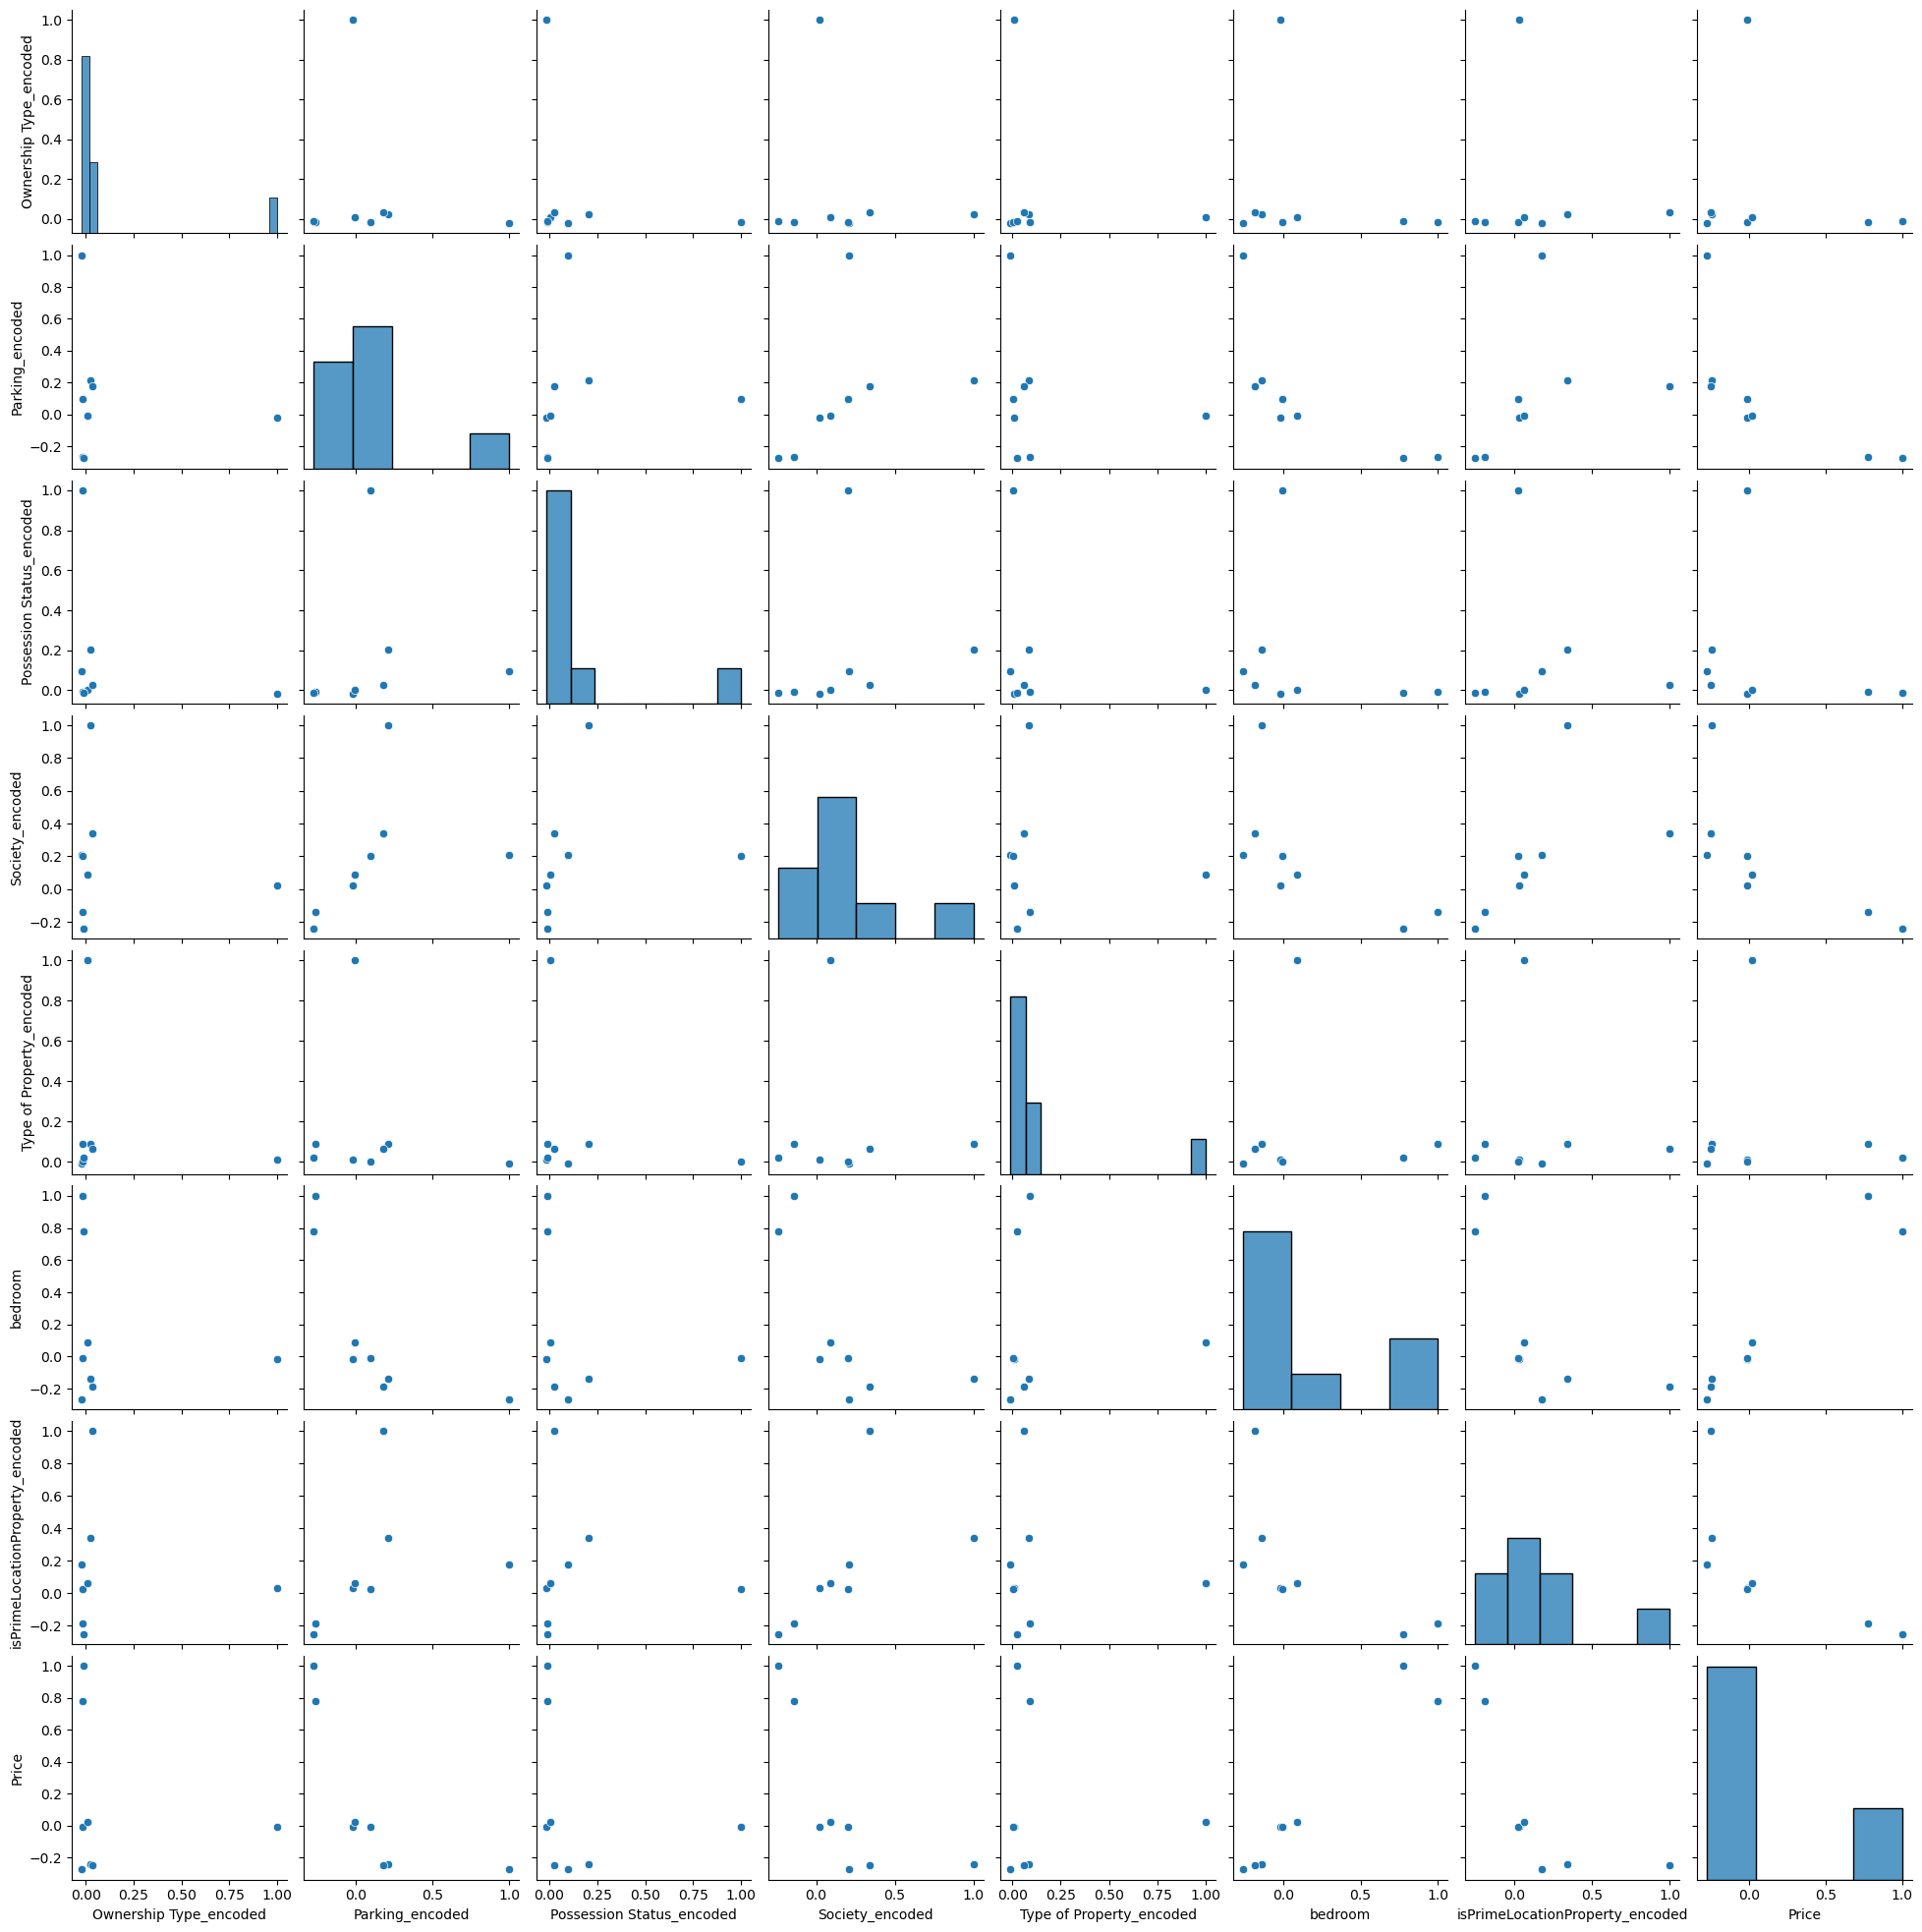

In [81]:
corr=data.iloc[:,6:14].corr()
sns.pairplot(corr)


<Axes: >

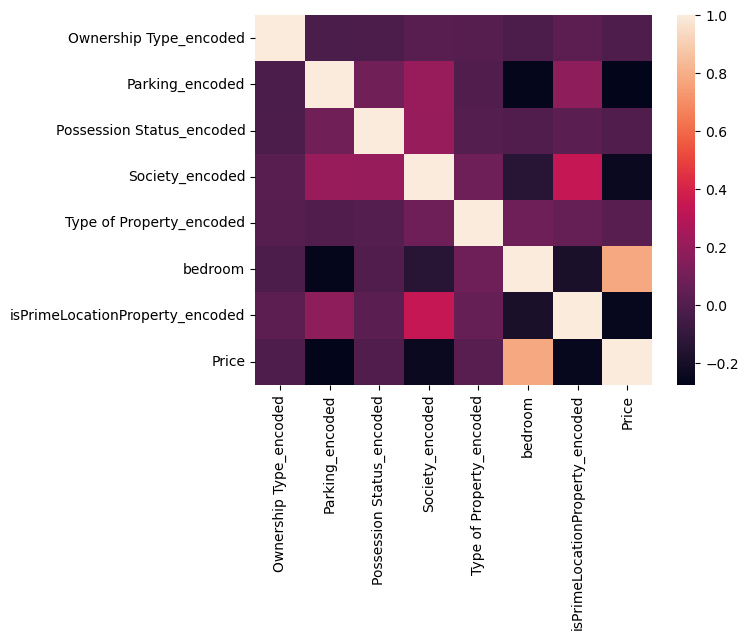

In [82]:
sns.heatmap(corr)

In [83]:
# Train-test split

X = data.drop(columns=['Price'])  # Replace 'target_column' with your target variable
Y = data['Price']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (10148, 13)
Shape of X_test: (2537, 13)
Shape of y_train: (10148,)
Shape of y_test: (2537,)


In [84]:
data

,Bathroom,Carpet Area,City_encoded,Covered Area,Location_encoded,Maintenance Charges,Ownership Type_encoded,Parking_encoded,Possession Status_encoded,Society_encoded,Type of Property_encoded,bedroom,isPrimeLocationProperty_encoded,Price
0,2.0,375.0,0,635.0,199,3.0,0,9064,0,0,0,1,0,3150000.0
1,2.0,579.0,0,579.0,199,3.0,0,9064,1,0,0,2,0,6300000.0
2,2.0,585.0,0,850.0,199,1200.0,0,1575,1,0,0,2,0,5400000.0
3,2.0,815.0,0,1050.0,199,3200.0,0,525,0,0,0,2,0,9000000.0
4,2.0,419.0,0,561.0,199,2500.0,0,9064,0,0,0,1,0,4950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,2.0,618.0,3,850.0,140,2500.0,0,9064,5,1,0,2,0,22200000.0
12681,2.0,1076.0,3,1376.0,140,12.0,0,9064,0,0,0,3,0,31000000.0
12682,2.0,618.0,3,970.0,140,9.0,0,9064,0,0,0,2,0,18500000.0
12683,2.0,821.0,3,850.0,421,4000.0,0,1575,1,0,0,2,0,22000000.0


In [167]:
data.dtypes

Bathroom                           float64
Carpet Area                        float64
City_encoded                         int64
Covered Area                       float64
Location_encoded                     int64
Maintenance Charges                float64
Ownership Type_encoded               int64
Parking_encoded                      int64
Possession Status_encoded            int64
Society_encoded                      int64
Type of Property_encoded             int64
bedroom                              int64
isPrimeLocationProperty_encoded      int64
Price                              float64
dtype: object